在机器学习中，StandardScaler、MinMaxScaler 和 MaxAbsScaler 是三种常用的特征缩放工具，它们通过不同的数学变换将特征映射到特定范围。下面从数学公式、适用场景和优缺点三个方面进行详细对比：

## 一、数学公式与实现原理

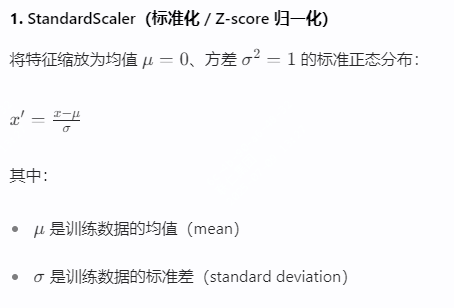

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X' = (X - mean(X)) / std(X)

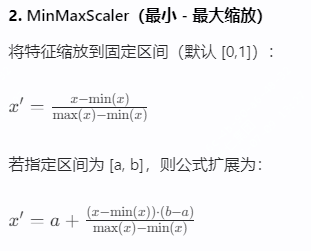

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))  # 默认范围 [0,1]
X_scaled = scaler.fit_transform(X)  # X' = (X - min(X)) / (max(X) - min(X))

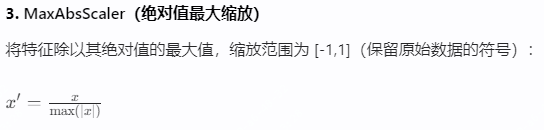

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(X)  # X' = X / max(|X|)

1. StandardScaler
 * 优点：
    * 保持数据的分布形状（仅调整均值和方差）；
    * 适合正态分布或近似正态分布的数据；
    * 使模型对不同特征的尺度更鲁棒。
 * 缺点：
    * 对异常值敏感（异常值会拉高 / 拉低均值和标准差）；
    * 可能导致特征值范围不一致（如 [-3,3] 或 [-10,10]）。
 * 何时使用：
    * 数据近似正态分布；
    * 模型对特征尺度敏感（如线性回归、SVM、神经网络）；
    * 需保留数据分布特性（如 PCA 降维前的预处理）。
2. MinMaxScaler
 * 优点：
    * 将数据强制缩放到固定区间（如 [0,1]），适合需要明确范围的场景；
    * 不改变数据的相对位置（仅线性变换）。
 * 缺点：
    * 若测试集的特征范围超出训练集，可能导致缩放结果超出预设区间；
    * 对异常值极度敏感（单个异常值可能压缩所有其他值的范围）。
 * 何时使用：
    * 数据分布未知，但需限定范围（如图像处理中的像素归一化）；
    * 模型需要非负输入（如某些神经网络激活函数要求输入在 [0,1]）；
    * 特征尺度差异大，但无异常值。
3. MaxAbsScaler
 * 优点：
    * 完全保留稀疏性（零值不变），适合稀疏数据（如文本特征、用户 - 物品交互矩阵）；
    * 不破坏数据的正负号（适合需保留方向信息的场景）。
 * 缺点：
    * 对异常值敏感（单个极大值可能导致所有其他值被压缩）；
    * 缩放后的数据范围可能不一致（取决于原始数据的绝对值最大值）。
 * 何时使用：
    * 处理稀疏矩阵（如 TF-IDF 特征）；
    * 数据包含负值，且需保留正负号（如金融数据中的盈亏值）；
    * 已中心化的数据（均值为 0）。

## 四、示例对比


假设原始数据为 [1, 5, 10, 15, 20]，分别用三种方法缩放：
1. StandardScaler：计算均值 (μ=10.2)，标准差 (σ≈6.86)；缩放后：[-1.34, -0.76, -0.03, 0.70, 1.43]。
2. MinMaxScaler：缩放后：[0.0, 0.21, 0.47, 0.74, 1.0]。
3. MaxAbsScaler：缩放后：[0.05, 0.25, 0.5, 0.75, 1.0]。